In [1]:
!pip install spacy
from spacy.lang.en.examples import sentences 

In [2]:
!pip install wordcloud

In [3]:
import numpy as np 
import pandas as pd 
import string 
import spacy 
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
get_ipython().run_line_magic('matplotlib', 'inline')


In [4]:
reviews = pd.read_csv("C:\\Users\\HP\\Desktop\\ExcelR\\Assignment\\Assignment 16 Text Mining\\APPLE_iPhone_SE.csv")
reviews

Ratings            Comment  \
0           5             Super!   
1           5          Must buy!   
2           5      Great product   
3           5     Simply awesome   
4           5     Classy product   
...       ...                ...   
9708        5  Terrific purchase   
9709        5     Classy product   
9710        5            Awesome   
9711        5             Super!   
9712        5  Terrific purchase   

                                                Reviews  
0     Great camera for pics and videos Battery life ...  
1     Great device. Let me tell the Pros..1. Superb ...  
2     Who all loves older size i.e., 4.7 inch type s...  
3     This iPhone SE is the best phone ever you get....  
4     This is my second iphone after iphone 4s. I’ve...  
...                                                 ...  
9708                      Absolutely brilliantREAD MORE  
9709  Superb phone. This is my 4th iPhone, I feel SE...  
9710                                 very niceREAD MORE  
9711       Loving it as of now. Good Product .READ MORE  
9712                      NiceElegant ElectricREAD MORE  

[9713 rows x 3 columns]

In [5]:
# # Text Preprocessing
import re #regular expression
import string


In [6]:
# Remove Punctuation

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [7]:
reviews['Reviews'] = reviews.Reviews.apply(clean)
reviews.Reviews

0       great camera for pics and videos battery life ...
1       great device let me tell the  superb build qua...
2       who all loves older size ie  inch type should ...
3       this iphone se is the best phone ever you get ...
4       this is my second iphone after iphone  ive bee...
                              ...                        
9708                        absolutely brilliantread more
9709    superb phone this is my  iphone i feel se  the...
9710                                   very niceread more
9711           loving it as of now good product read more
9712                        niceelegant electricread more
Name: Reviews, Length: 9713, dtype: object

In [8]:
reviews = [Reviews.strip() for Reviews in reviews.Reviews] # remove both the leading and the trailing characters
reviews = [Reviews for Reviews in reviews if Reviews] # removes empty strings, because they are considered in Python as False
reviews[0:10]


['great camera for pics and videos battery life is good so far with some setting turn of which i never use and when i use i turn those on and i use it in power saving mode all the time so a full day with light gaming of  or more using camera for  or more listening music in my car on youtube and bluetooth on for couple of hours it gives me full day of battery varing from  to  hours sot per dayperformance is top notch plays every game and every task with easevery premium phone lookread more',
 'great device let me tell the  superb build quality  great display  camera is great in good lighting conditions  processing is great  sound is superb  call quality is great  red colour looks  portrait mode photography is superbread more',
 'who all loves older size ie  inch type should definitely go for this  nothing is better than xr xs or  best for price and usageread more',
 'this iphone se is the best phone ever you get beautifully designed gives a classy look in your palms moreover performance

In [9]:
# Joining the list into one string/text
reviews_Reviews = ' '.join(reviews)
len(reviews_Reviews)

946948

In [10]:
print(reviews_Reviews)

great camera for pics and videos battery life is good so far with some setting turn of which i never use and when i use i turn those on and i use it in power saving mode all the time so a full day with light gaming of  or more using camera for  or more listening music in my car on youtube and bluetooth on for couple of hours it gives me full day of battery varing from  to  hours sot per dayperformance is top notch plays every game and every task with easevery premium phone lookread more great device let me tell the  superb build quality  great display  camera is great in good lighting conditions  processing is great  sound is superb  call quality is great  red colour looks  portrait mode photography is superbread more who all loves older size ie  inch type should definitely go for this  nothing is better than xr xs or  best for price and usageread more this iphone se is the best phone ever you get beautifully designed gives a classy look in your palms moreover performance wise it is a 

In [11]:
import re

In [12]:
# Tokenization
from nltk.tokenize import word_tokenize
reviews_tokens = word_tokenize(reviews_Reviews)
print(reviews_tokens)

['great', 'camera', 'for', 'pics', 'and', 'videos', 'battery', 'life', 'is', 'good', 'so', 'far', 'with', 'some', 'setting', 'turn', 'of', 'which', 'i', 'never', 'use', 'and', 'when', 'i', 'use', 'i', 'turn', 'those', 'on', 'and', 'i', 'use', 'it', 'in', 'power', 'saving', 'mode', 'all', 'the', 'time', 'so', 'a', 'full', 'day', 'with', 'light', 'gaming', 'of', 'or', 'more', 'using', 'camera', 'for', 'or', 'more', 'listening', 'music', 'in', 'my', 'car', 'on', 'youtube', 'and', 'bluetooth', 'on', 'for', 'couple', 'of', 'hours', 'it', 'gives', 'me', 'full', 'day', 'of', 'battery', 'varing', 'from', 'to', 'hours', 'sot', 'per', 'dayperformance', 'is', 'top', 'notch', 'plays', 'every', 'game', 'and', 'every', 'task', 'with', 'easevery', 'premium', 'phone', 'lookread', 'more', 'great', 'device', 'let', 'me', 'tell', 'the', 'superb', 'build', 'quality', 'great', 'display', 'camera', 'is', 'great', 'in', 'good', 'lighting', 'conditions', 'processing', 'is', 'great', 'sound', 'is', 'superb', '

In [13]:
len(reviews_tokens) 

163922

In [14]:
# Stopwords
# Remove Stopwords
import nltk
from nltk.corpus import stopwords
my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in reviews_tokens if not word in my_stop_words]
print(no_stop_tokens[0:100])


['great', 'camera', 'pics', 'videos', 'battery', 'life', 'good', 'far', 'setting', 'turn', 'never', 'use', 'use', 'turn', 'use', 'power', 'saving', 'mode', 'time', 'full', 'day', 'light', 'gaming', 'using', 'camera', 'listening', 'music', 'car', 'youtube', 'bluetooth', 'couple', 'hours', 'gives', 'full', 'day', 'battery', 'varing', 'hours', 'sot', 'per', 'dayperformance', 'top', 'notch', 'plays', 'every', 'game', 'every', 'task', 'easevery', 'premium', 'phone', 'lookread', 'great', 'device', 'let', 'tell', 'superb', 'build', 'quality', 'great', 'display', 'camera', 'great', 'good', 'lighting', 'conditions', 'processing', 'great', 'sound', 'superb', 'call', 'quality', 'great', 'red', 'colour', 'looks', 'portrait', 'mode', 'photography', 'superbread', 'loves', 'older', 'size', 'ie', 'inch', 'type', 'definitely', 'go', 'nothing', 'better', 'xr', 'xs', 'best', 'price', 'usageread', 'iphone', 'se', 'best', 'phone', 'ever']


In [15]:
len(no_stop_tokens)  

91915

In [16]:
# Noramalize the data
lower_words = [text.lower() for text in no_stop_tokens]
print(lower_words[0:50])

['great', 'camera', 'pics', 'videos', 'battery', 'life', 'good', 'far', 'setting', 'turn', 'never', 'use', 'use', 'turn', 'use', 'power', 'saving', 'mode', 'time', 'full', 'day', 'light', 'gaming', 'using', 'camera', 'listening', 'music', 'car', 'youtube', 'bluetooth', 'couple', 'hours', 'gives', 'full', 'day', 'battery', 'varing', 'hours', 'sot', 'per', 'dayperformance', 'top', 'notch', 'plays', 'every', 'game', 'every', 'task', 'easevery', 'premium']


In [19]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm')

In [20]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(lower_words))
print(doc[0:40])

great camera pics videos battery life good far setting turn never use use turn use power saving mode time full day light gaming using camera listening music car youtube bluetooth couple hours gives full day battery varing hours sot per


In [23]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:40])

['great', 'camera', 'pic', 'video', 'battery', 'life', 'good', 'far', 'set', 'turn', 'never', 'use', 'use', 'turn', 'use', 'power', 'save', 'mode', 'time', 'full', 'day', 'light', 'gaming', 'use', 'camera', 'listen', 'music', 'car', 'youtube', 'bluetooth', 'couple', 'hour', 'give', 'full', 'day', 'battery', 'varing', 'hour', 'sot', 'per']


# # Feature Extaction

# # 1. Using CountVectorizer

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(lemmas)

In [25]:
print(cv.get_feature_names()[100:200])

['advertising', 'advice', 'advise', 'aestheticsread', 'af', 'afapple', 'afdisplay', 'affect', 'afford', 'affordable', 'affordableread', 'affordablesimple', 'affordale', 'afordable', 'aforementione', 'afraid', 'after', 'afterall', 'afternoon', 'afternoonthat', 'aftr', 'aftread', 'againmy', 'againonce', 'againperformance', 'againread', 'age', 'agent', 'agentread', 'aggressive', 'aggressively', 'ago', 'agoi', 'agree', 'ahead', 'ahhh', 'ahift', 'ai', 'air', 'airdrop', 'airplane', 'airpod', 'airpodsread', 'airpordsread', 'airport', 'airtel', 'aka', 'al', 'alarm', 'album', 'alcohol', 'alive', 'all', 'allconsbattery', 'allin', 'alllread', 'allow', 'allread', 'allround', 'allthe', 'allthere', 'allvery', 'almost', 'alone', 'along', 'alot', 'alotread', 'already', 'alright', 'also', 'alsocamera', 'alsoiam', 'alsoif', 'alsoit', 'alsoread', 'alternate', 'alternative', 'although', 'alto', 'altogether', 'altough', 'aluminium', 'aluminum', 'always', 'alwaysapple', 'alwaysperformance', 'alwaysread', 'a

In [26]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [27]:
print(tweetscv.toarray().shape) 

(94938, 8092)


# # 2. CountVectorizer with N-grams (Bigrams & Trigrams)

In [28]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [29]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['also', 'amazing', 'android', 'apple', 'awesome', 'awesomeread', 'back', 'backup', 'bad', 'battery', 'big', 'bionic', 'budget', 'buy', 'call', 'camera', 'charge', 'charger', 'come', 'compact', 'day', 'delivery', 'device', 'display', 'do', 'drain', 'even', 'everything', 'excellent', 'except', 'experience', 'fast', 'feature', 'feel', 'first', 'flipkart', 'flipkartread', 'get', 'give', 'go', 'good', 'goodread', 'great', 'handy', 'happy', 'heavy', 'hour', 'io', 'iphone', 'issue', 'itread', 'last', 'life', 'like', 'little', 'look', 'love', 'low', 'make', 'mobile', 'money', 'moneyread', 'much', 'need', 'nice', 'niceread', 'not', 'one', 'overall', 'perfect', 'performance', 'phone', 'phoneread', 'price', 'problem', 'product', 'productread', 'purchase', 'quality', 'read', 'really', 'screen', 'se', 'size', 'small', 'super', 'superb', 'take', 'thank', 'thing', 'time', 'usage', 'use', 'user', 'value', 'want', 'well', 'work', 'worth', 'would']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 

# # 3. TF-IDF Vectorizer

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [31]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['able', 'absolutely', 'actually', 'adapter', 'add', 'affordable', 'almost', 'along', 'already', 'also', 'although', 'always', 'amazing', 'amazingread', 'android', 'another', 'apart', 'app', 'apple', 'appleread', 'around', 'available', 'average', 'averageread', 'awesome', 'awesomeread', 'awsome', 'back', 'backup', 'backupread', 'bad', 'badread', 'bank', 'basic', 'battery', 'batteryread', 'bbd', 'be', 'beast', 'beastread', 'beat', 'beautiful', 'become', 'believe', 'bestread', 'betterread', 'bezel', 'big', 'billion', 'bionic', 'bit', 'black', 'blow', 'body', 'box', 'brand', 'brilliant', 'budget', 'budgetread', 'build', 'button', 'buy', 'buying', 'buyread', 'cable', 'call', 'camera', 'cameraread', 'can', 'capacity', 'care', 'carry', 'case', 'change', 'charge', 'charger', 'cheap', 'check', 'chip', 'chipset', 'choice', 'choose', 'class', 'clear', 'click', 'color', 'colour', 'come', 'comfortable', 'compact', 'compare', 'complain', 'complete', 'compromise', 'con', 'concern', 'consider', 'cool

In [32]:
clean_reviews=' '.join(lemmas)
clean_reviews

'great camera pic video battery life good far set turn never use use turn use power save mode time full day light gaming use camera listen music car youtube bluetooth couple hour give full day battery varing hour sot per dayperformance top notch play every game every task easevery premium phone lookread great device let tell superb build quality great display camera great good lighting condition process great sound superb call quality great red colour look portrait mode photography superbread love old size ie inch type definitely go nothing well xr xs good price usageread iphone se good phone ever get beautifully design give classy look palm moreover performance wise benchmark disappointed budget purchase point size look will not disappoint strongly recommend phone people work orient game loves skip phone game phone good feature stunning look performance battery life goodread second iphone iphone I ve long time android user ill tell phone prospective buyer photo video enthusiast reliab

# # Generate Word Cloud

In [33]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

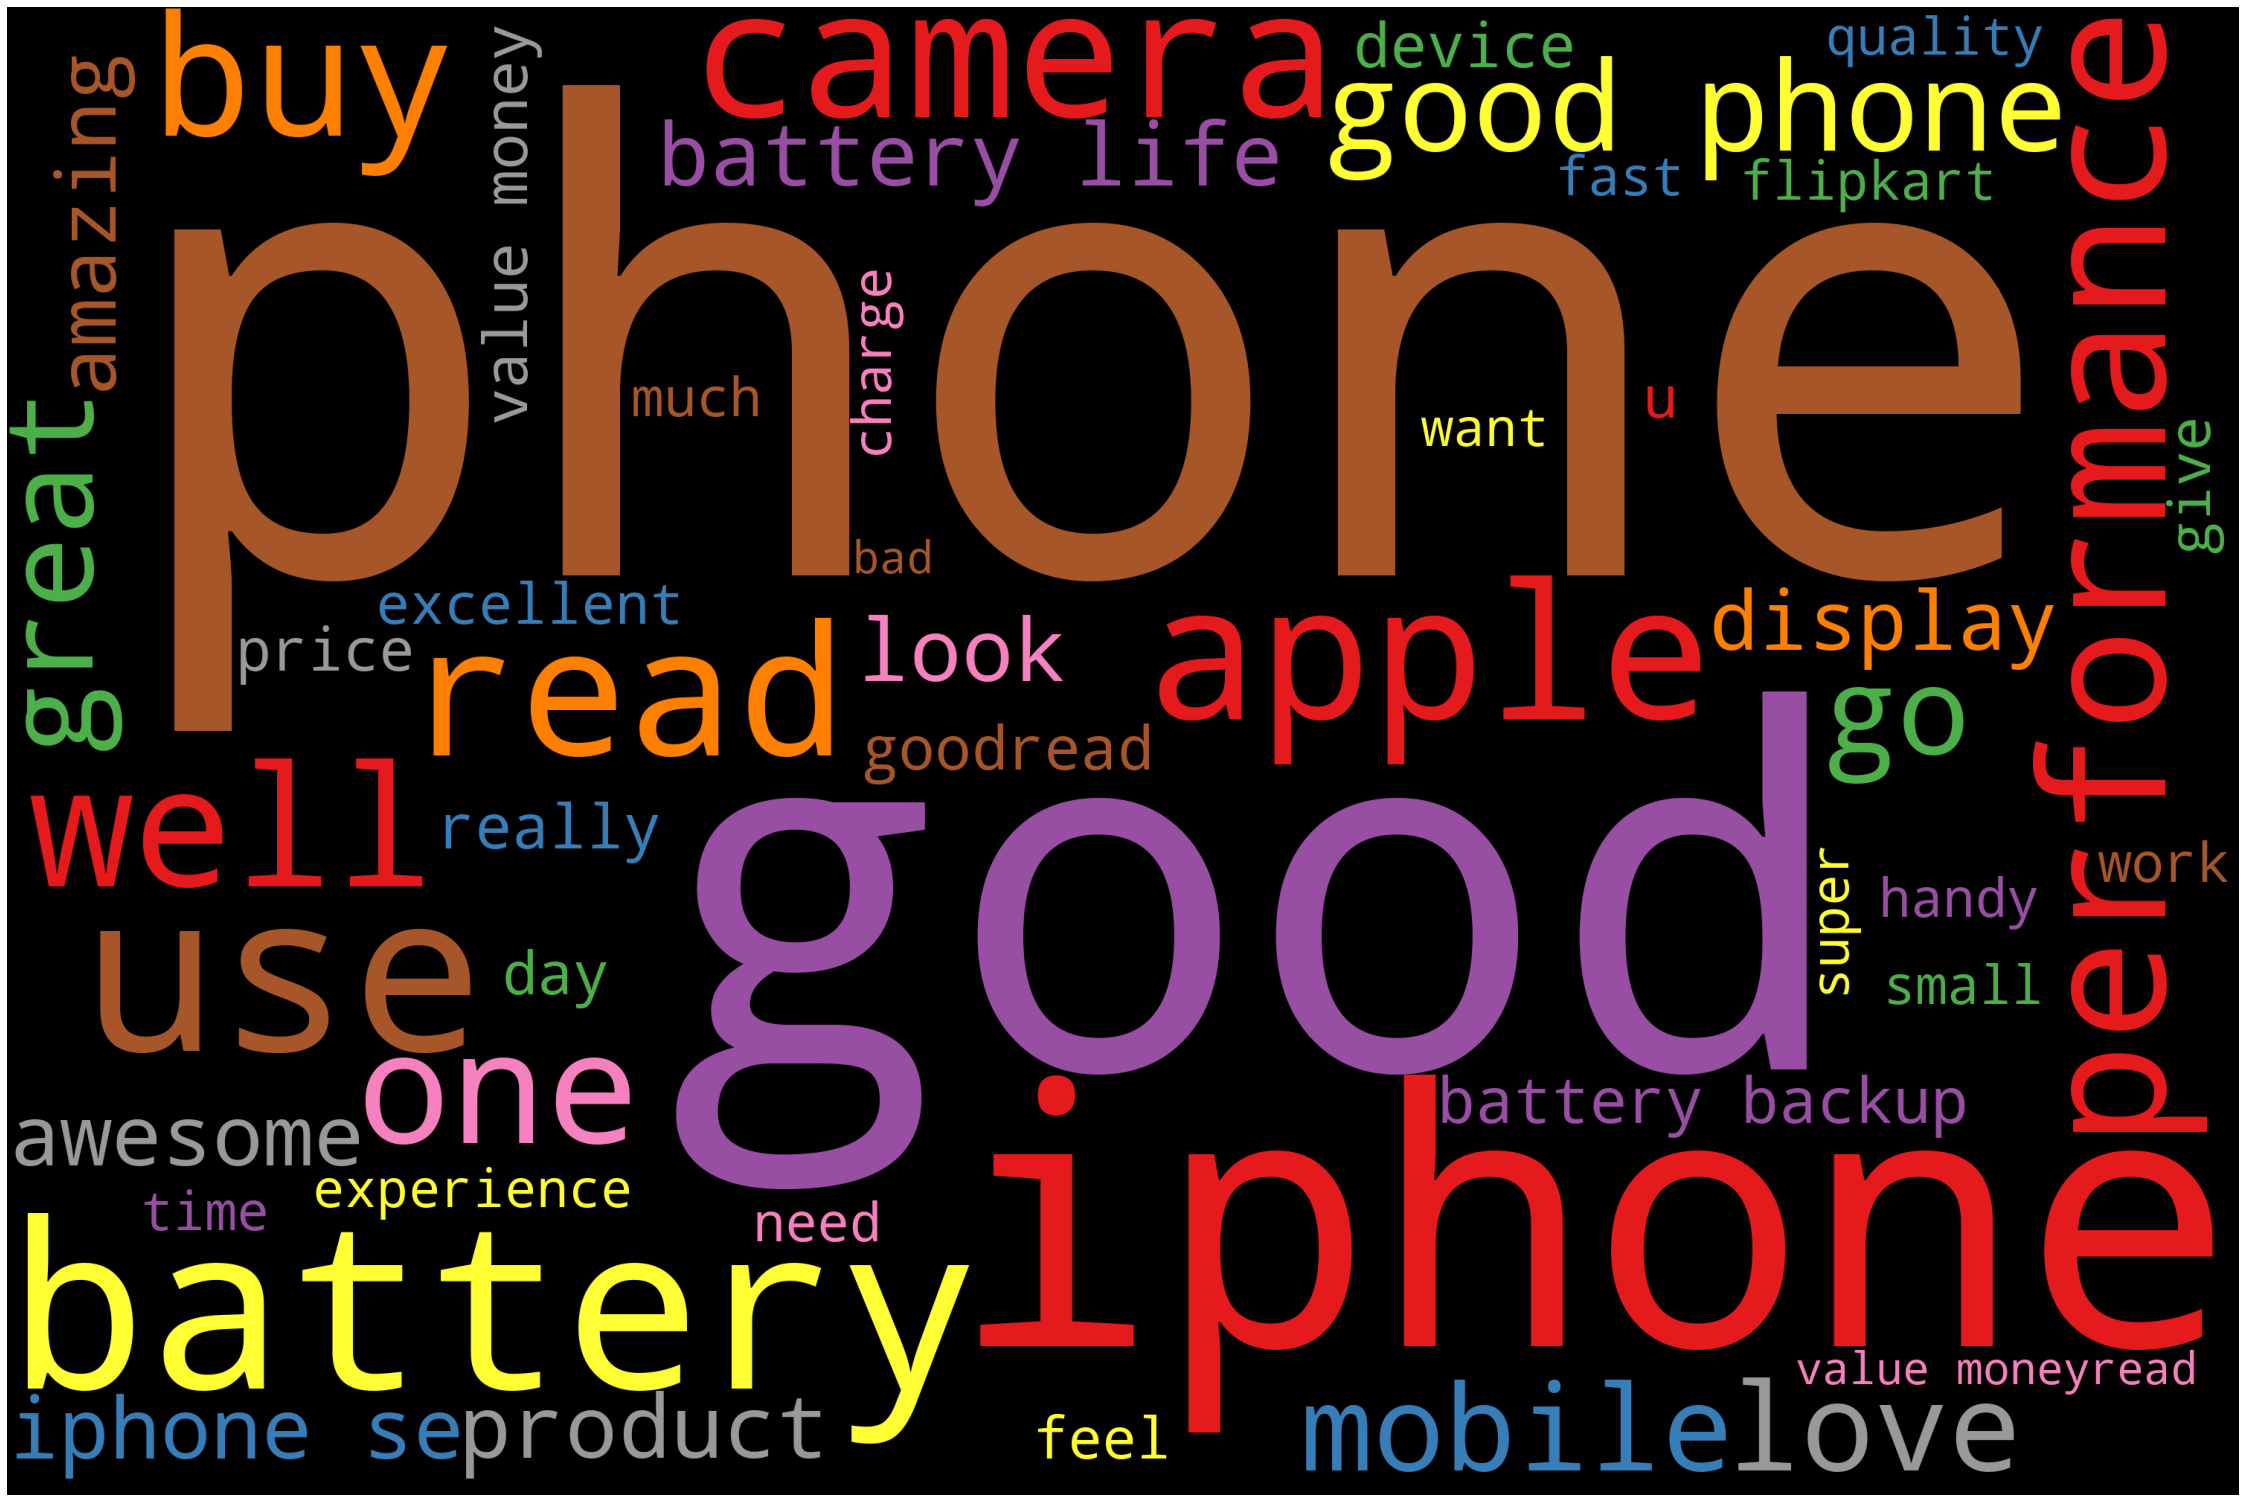

In [34]:
# Generate Word Cloud

from wordcloud import WordCloud, STOPWORDS

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)


# # Named Entity Recognition (NER)

In [35]:
##Part Of Speech Tagging
nlp = spacy.load('en_core_web_sm')

In [36]:
one_block = clean_reviews
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)


In [37]:
for token in doc_block[500:600]:
    print(token, token.pos_)

iphone NOUN
x X
xs NOUN
xr PROPN
software NOUN
io VERB
latestread NOUN
let VERB
face VERB
main ADJ
reason NOUN
you PRON
re VERB
even ADV
consider VERB
want VERB
compact ADJ
phone NOUN
do AUX
not PART
compromise VERB
power NOUN
get AUX
os ADV
update VERB
another DET
year NOUN
decent ADJ
camera NOUN
waterproof NOUN
wireless ADJ
charge NOUN
add VERB
advantage NOUN
there PRON
s VERB
thing NOUN
could AUX
ve AUX
do VERB
well ADV
battery NOUN
barely ADV
adequate ADJ
day NOUN
moderate ADJ
bezel NOUN
could AUX
reduce VERB
screen NOUN
body NOUN
night NOUN
mode NOUN
camera NOUN
software NOUN
feature NOUN
read VERB
one NUM
word NOUN
beautiful ADJ
iphone NOUN
❤ PUNCT
️ ADJ
premium NOUN
feeljust NOUN
go VERB
without ADP
doubt ADJ
superb NOUN
camera NOUN
handy ADJ
white ADJ
color PROPN
soo PROPN
good ADJ
phone NOUN
someone PRON
do AUX
not PART
like VERB
big ADJ
screen NOUN
phonesread ADJ
iphone NOUN
se X
look VERB
premium NOUN
😍 NOUN
batterymost ADV
people NOUN
think VERB
mah NOUN
battery NOUN
suffic

In [38]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[500:600])


['phone', 'price', 'come', 'background', 'migrating', 'datum', 'take', 'time', 'battery', 'backup', 'day', 'set', 'feel', 'phone', 'give', 'battery', 'backup', 'backup', 'battery', 'phone', 'android', 'capacitycamera', 'use', 'colour', 'tone', 'close', 'see', 'withread', 'switch', 'iphone', 'iphone', 'go', 'iphone', 'come', 'power', 'camera', 'device', 'size', 'use', 'hold', 'hand', 'deliver', 'day', 'fan', 'io', 'm', 'apple', 'ecosystem', 'm', 'wonder', 'iphone', 'read', 'iphone', 'use', 'day', 'difference', 'android', 'iphone', 'camera', 'way', 'thing', 'miss', 'phone', 'framesec', 'motion', 'recording', 'performance', 'android', 'eye', 'glue', 'screen', 'battery', 'life', 'fact', 'issue', 'phone', 'read', 'await', 'iphone', 'come', 'day', 'order', 'iphone', 'line', 'performance', 'design', 'ratesfirst', 'iphone', 'life', 'compare', 'functionality', 'chip', 'price', 'want', 'experience', 'screen', 'phone', 'camera', 'experience', 'chip']


In [39]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [40]:
X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

In [41]:
words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results


word  count
0        phone   3444
1      battery   2602
2       iphone   1772
3       camera   1172
4          use   1073
5  performance   1058
6      product   1052
7         read    867
8        apple    787
9          buy    712

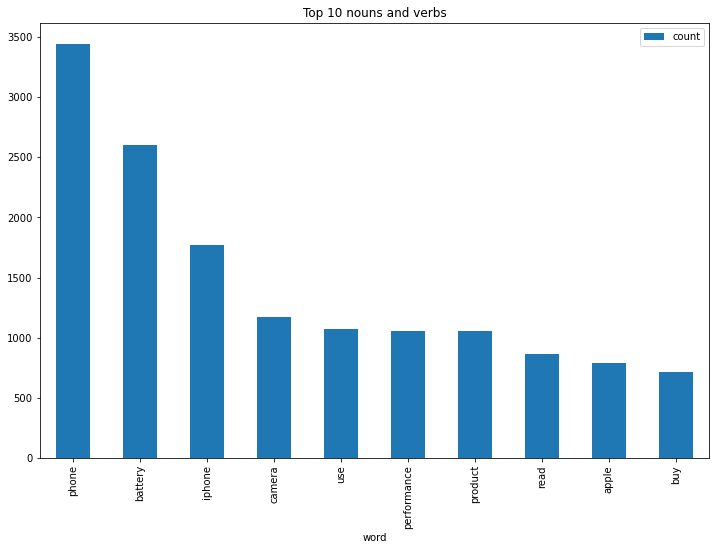

In [42]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

# # Emotion Mining - Sentiment Analysis

In [43]:
reviews = pd.read_csv("C:\\Users\\HP\\Desktop\\ExcelR\\Assignment\\Assignment 16 Text Mining\\APPLE_iPhone_SE.csv")

In [44]:
import re #regular expression
import string
# Remove Punctuation

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)


In [46]:
reviews['Reviews'] = reviews.Reviews.apply(clean)

In [49]:
reviews = [Reviews.strip() for Reviews in reviews.Reviews] 
reviews = [Reviews for Reviews in reviews if Reviews] 
reviews

['great camera for pics and videos battery life is good so far with some setting turn of which i never use and when i use i turn those on and i use it in power saving mode all the time so a full day with light gaming of  or more using camera for  or more listening music in my car on youtube and bluetooth on for couple of hours it gives me full day of battery varing from  to  hours sot per dayperformance is top notch plays every game and every task with easevery premium phone lookread more',
 'great device let me tell the  superb build quality  great display  camera is great in good lighting conditions  processing is great  sound is superb  call quality is great  red colour looks  portrait mode photography is superbread more',
 'who all loves older size ie  inch type should definitely go for this  nothing is better than xr xs or  best for price and usageread more',
 'this iphone se is the best phone ever you get beautifully designed gives a classy look in your palms moreover performance

In [50]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(' '.join(reviews))
sentences

['great camera for pics and videos battery life is good so far with some setting turn of which i never use and when i use i turn those on and i use it in power saving mode all the time so a full day with light gaming of  or more using camera for  or more listening music in my car on youtube and bluetooth on for couple of hours it gives me full day of battery varing from  to  hours sot per dayperformance is top notch plays every game and every task with easevery premium phone lookread more great device let me tell the  superb build quality  great display  camera is great in good lighting conditions  processing is great  sound is superb  call quality is great  red colour looks  portrait mode photography is superbread more who all loves older size ie  inch type should definitely go for this  nothing is better than xr xs or  best for price and usageread more this iphone se is the best phone ever you get beautifully designed gives a classy look in your palms moreover performance wise it is 

In [51]:
sent_df = pd.DataFrame(reviews,columns=['sentence'])
sent_df

sentence
0     great camera for pics and videos battery life ...
1     great device let me tell the  superb build qua...
2     who all loves older size ie  inch type should ...
3     this iphone se is the best phone ever you get ...
4     this is my second iphone after iphone  ive bee...
...                                                 ...
9708                      absolutely brilliantread more
9709  superb phone this is my  iphone i feel se  the...
9710                                 very niceread more
9711         loving it as of now good product read more
9712                      niceelegant electricread more

[9713 rows x 1 columns]

In [53]:
affin = pd.read_csv("C:\\Users\\HP\\Desktop\\ExcelR\\Assignment\\Assignment 16 Text Mining\\Afinn.csv", sep=',', encoding='latin-1')

In [54]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [55]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score


In [56]:
# manual testing
calculate_sentiment(text='great')


3

In [57]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']


0        8
1       28
2        6
3       17
4        4
        ..
9708     0
9709     7
9710     0
9711     6
9712     0
Name: sentiment_value, Length: 9713, dtype: int64

In [58]:
sent_df.sort_values(by='sentiment_value')

sentence  sentiment_value
1676  i never write reviewbut first time i want to w...              -11
2392  se  i got has battery problem from  day also s...              -10
2796  worst purchase of all time within a month star...               -9
471   i have given my redmi note  phone in exchange ...               -9
8533  actually guys im telling this to all please ju...               -8
...                                                 ...              ...
1     great device let me tell the  superb build qua...               28
3708  comes with apple  bionic chip very powerchip w...               29
170   this phone keeps up its promise      one day b...               29
431   i am writing this review after more than a mon...               29
397   received handset  good condition  fast deliver...               33

[9713 rows x 2 columns]

In [59]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    9713.000000
mean        3.138783
std         3.876105
min       -11.000000
25%         0.000000
50%         3.000000
75%         5.000000
max        33.000000
Name: sentiment_value, dtype: float64

In [60]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

sentence  sentiment_value
20    as being a frequent apple user i couldnt find ...               -1
76    i had been eagerly waiting for iphone se  ever...                0
90    mp back camera more better than  camera phones...                0
242   my first ever apple productits small snappy ha...                0
246   this is my first apple phone previously i was ...               -1
...                                                 ...              ...
9699                                   awesomeread more                0
9701  this iphone is premium but battery is short di...                0
9708                      absolutely brilliantread more                0
9710                                 very niceread more                0
9712                      niceelegant electricread more                0

[3339 rows x 2 columns]

In [61]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

sentence  sentiment_value
0     great camera for pics and videos battery life ...                8
1     great device let me tell the  superb build qua...               28
2     who all loves older size ie  inch type should ...                6
3     this iphone se is the best phone ever you get ...               17
4     this is my second iphone after iphone  ive bee...                4
...                                                 ...              ...
9705                           awesome phone 👍read more                4
9706                        really great phoneread more                3
9707  very fast delivery by flipkart less than expec...                2
9709  superb phone this is my  iphone i feel se  the...                7
9711         loving it as of now good product read more                6

[6374 rows x 2 columns]

In [62]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

sentence  sentiment_value  \
0     great camera for pics and videos battery life ...                8   
1     great device let me tell the  superb build qua...               28   
2     who all loves older size ie  inch type should ...                6   
3     this iphone se is the best phone ever you get ...               17   
4     this is my second iphone after iphone  ive bee...                4   
...                                                 ...              ...   
9708                      absolutely brilliantread more                0   
9709  superb phone this is my  iphone i feel se  the...                7   
9710                                 very niceread more                0   
9711         loving it as of now good product read more                6   
9712                      niceelegant electricread more                0   

      index  
0         0  
1         1  
2         2  
3         3  
4         4  
...     ...  
9708   9708  
9709   9709  
9710   9710  
9711   9711  
9712   9712  

[9713 rows x 3 columns]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

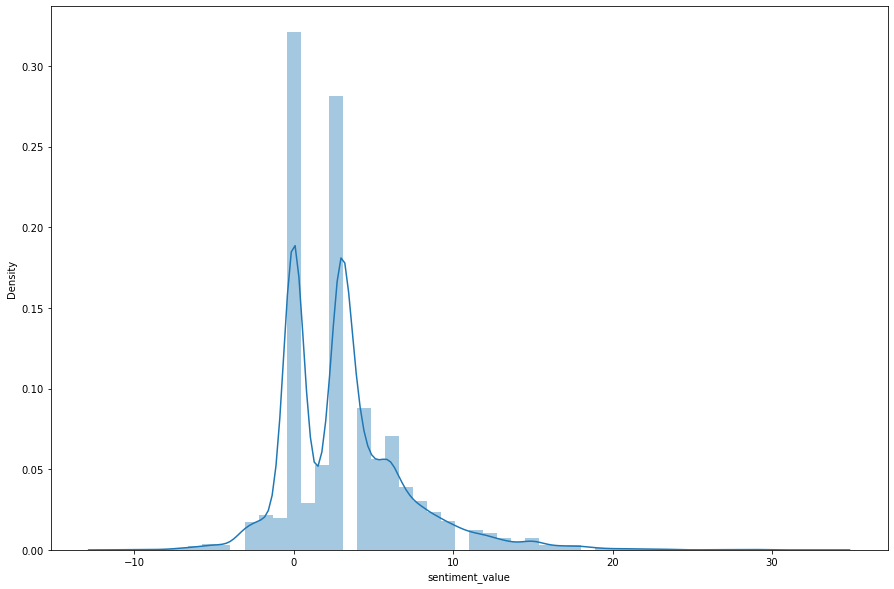

In [63]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

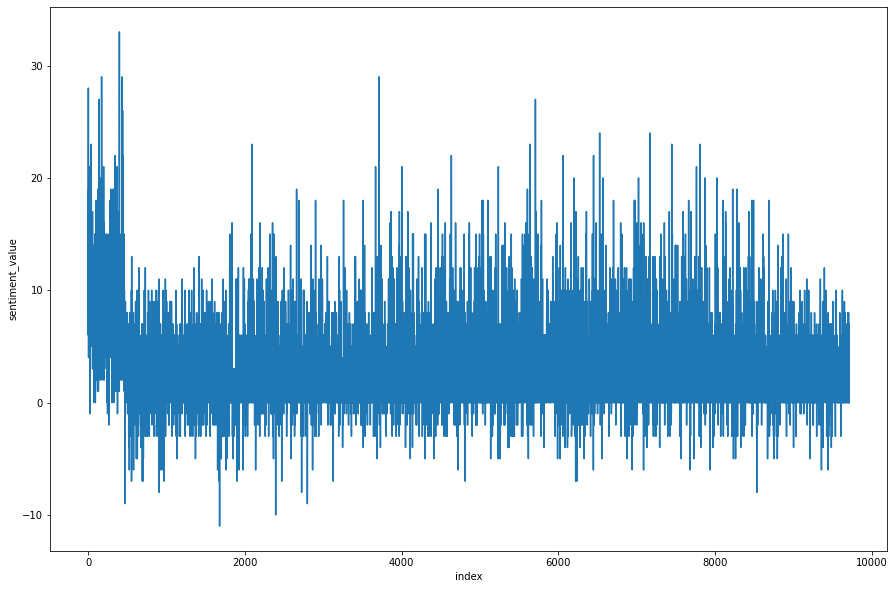

In [64]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)